# Finding the Best Markets to Advertise In

# Introduction

We're working for an e-learning company which offers online courses on programming. Most of their courses are in web development, data science and game development. The company needs to promote their online programmes and invest some money in advertisement. Our purpose in this project is to help them find the two best markets to advertise their products in.

We found a [survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969) from freeCodeCamp which we will be using to carry out our analysis. [freeCodeCamp](https://www.freecodecamp.org/) is an online learning platform that offers courses on web development and they recently published a survey which attracted new coders with varing interests. We've explored this option since it's cheaper than organizing surveys ourselves.

The solid conclusion we reached is that the US would be a good market to advertise in. For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so that they can use their domain knowledge to take the best decision.

# Understanding the Data

In [22]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# Reading in the data
survey = pd.read_csv('../data/2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [3]:
# Looking for the number of rows and columns in the dataset 
survey.shape

(18175, 136)

In [4]:
# Exploring the first five rows of the dataset
survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for Sample Representativity

In [5]:
# Finding relevant columns for our analysis 
survey.columns.tolist()

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

We as a company sell multiple different courses: from web and mobile development to data science and games. For the purpose of our analysis, we're aiming at answering questions about a population of new coders who are interested in the subjects that we teach. We'd like to know things like where the coders are located, which are the locations with the greatest number of coders, and how much money are coders willing to spend on their learnings. Here are the titles of the relevant columns:

- Age
- Country of Citizenship
- Country of Residence
- Field of Employment
- Employment Status
- Hours of Learning
- Income
- Job Preference 
- Language Spoken at Home
- Money for Learning
- Months of Programming Experience

Before starting with our analysis, let's check if our sample is representative for our population of interest. To do that, we'll explore the `JobRoleInterest` column of our dataset. In that way, we'll know what the new coders are most interested in. 

In [6]:
# Generating a frequency distribution table
survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

As shown above, respondents chose more than one option to the question, which means that they are interested in more than one subject. However, this sample is still representative. In fact, many respondents are interested in many relevant jobs to our purpose, such as web and mobile development. 

Let's discover the percentages of some individual roles. This will give us a better view of how relevant the sample is.

In [7]:
# Dropping all null values 
job_interest = survey['JobRoleInterest'].dropna()

# Selecting only the first job of interest for respondents with multiple interests 
job_interest = job_interest.str.split(",").str[0]

# Displaying the first 20 respondents results in percentage
job_interest_freq = job_interest.value_counts(normalize=True).head(20)*100
job_interest_freq

Full-Stack Web Developer        24.427918
  Front-End Web Developer       17.820366
Back-End Web Developer          11.084096
  Mobile Developer               8.152174
  Data Scientist                 7.479977
Game Developer                   6.664760
  User Experience Designer       5.592105
Information Security             4.862700
Data Engineer                    4.347826
  DevOps / SysAdmin              3.318078
  Product Manager                3.060641
  Quality Assurance Engineer     1.558924
Software Engineer                0.071510
Software Developer               0.057208
undecided                        0.028604
Not sure                         0.028604
Not sure yet                     0.028604
Artificial Intelligence          0.028604
Unsure                           0.028604
Systems Programmer               0.014302
Name: JobRoleInterest, dtype: float64

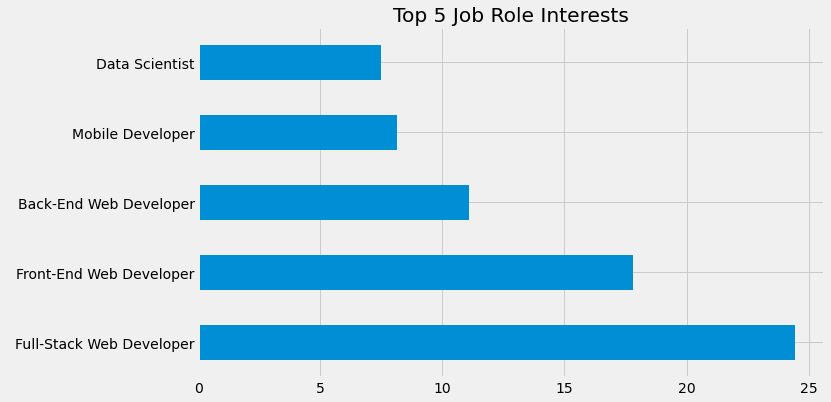

In [8]:
# Plotting our results
style.use('fivethirtyeight')
job_interest_freq.head().plot.barh(width=0.5, figsize=(10, 6))
plt.title('Top 5 Job Role Interests')
plt.show()

As shown by the graph above, the highest percentage of respondents chose Full-Stack Web Developer, followed by Front-End Web Developer. Other roles included Back-End Web Developer, Mobile Developer, and Data Scientists. This confirms the hypothesis that our sample is representative of the population we want to explore. 

It is worth mentioning though that the frequency table we coded above is just a point of reference. In fact, we only looked at the first job of interest for respondents with many interests, excluding all the other options selected by other the respondents, which makes the frequency table slightly inaccurate. However, the table helped us find out that the sample has the right categories of people for our purpose, so now we can start our analysis.

# New Coders - Locations and Densities

We want to know where these new coders are located and what are the densities (how many coders there are) for each locations. This information is stored into the `CountryLive` column of our dataset, which describes what country each participant lives in. Since the data set provides information at a country level, we can think of each country as an individual market. This means that we can frame our goal as finding the two best countries to advertise in. 

A good indicator for our search is the number of potential customers: the more potential customers in a country, the better. Let's go ahead and analyse our data.

In [9]:
# Ensuring sample is representative by dropping all rows where participants didn't answer 
filt = survey['JobRoleInterest'].notnull()

# Generating an absolute and relative frequency tables for the CountryLive column
abs_freq = survey[filt]['CountryLive'].value_counts()
percentage = survey[filt]['CountryLive'].value_counts(normalize=True).round(4)*100
country_freq = pd.DataFrame({'Absolute Frequency': abs_freq,
                           'Percentage': percentage})
country_freq

,Absolute Frequency,Percentage
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
...,...,...
Liberia,1,0.01
Papua New Guinea,1,0.01
Guadeloupe,1,0.01
Gibraltar,1,0.01


As shown above, the two markets with the highest number of coders are the US and India. It would make sense at this point to choose to advertise our product in these two countries. However, we also need to explore the willingness of these new coders to spend money for their learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for our company.

# Spending Money for Learning

Since our company sells subscriptions at a monthly price, we're interested in finding out how much money each student spends per month. We'll also choose only the US, India, the UK, and Canada for our analysis. This is because not only do they have the highest absolute frequencies in our sample, but also because they have English as the official language, and our online courses are in English.

In [10]:
# Discovering the amount of money spent by coders from the moment they started coding until they completed the survey
survey['MonthsProgramming'].value_counts()

1.0      1697
12.0     1497
2.0      1338
3.0      1333
6.0      1330
         ... 
720.0       1
130.0       1
244.0       1
113.0       1
89.0        1
Name: MonthsProgramming, Length: 154, dtype: int64

Some of the values from the above column are 0 because some students answered that they had been learning to code for 0 months. It might be that they had just started when they completed the survey. Let's exclude these values from our analysis to avoid dividing by 0. 

In [12]:
# Replacing 0 values with 1
survey['MonthsProgramming'].replace(0, 1, inplace = True)

# Creating a new column to find the amount of money a student has spent per month 
survey['Money_Per_Month'] = survey['MoneyForLearning']/survey['MonthsProgramming']

# Counting null values in the new column
survey['Money_Per_Month'].isnull().value_counts()

False    16180
True      1995
Name: Money_Per_Month, dtype: int64

In [15]:
# Removing null values
survey.dropna(subset=['CountryLive', 'Money_Per_Month', 'JobRoleInterest'], inplace=True)

# Extracting the mean monthly amount paid in each country
country_grp = survey.groupby('CountryLive')
country_mean_amount = pd.DataFrame({'mean_amount':country_grp['Money_Per_Month'].mean()}).reset_index()

# Getting our country of interest
interest_countries = country_mean_amount[(country_mean_amount['CountryLive'] == 'United States of America')
                                         | (country_mean_amount['CountryLive'] == 'India')
                                         | (country_mean_amount['CountryLive'] == 'United Kingdom')
                                         | (country_mean_amount['CountryLive'] == 'Canada')]

In [19]:
# Sorting mean values of each country in descending order
interest_countries.sort_values('mean_amount', ascending=False).round(1) # rounding the means to one decimal point 

,CountryLive,mean_amount
122,United States of America,228.0
52,India,135.1
19,Canada,113.5
121,United Kingdom,45.5


As we can see, the mean of the UK and Canada are surprisingly lower comparing to the mean of India. If we considered some socio-economical metrics such as GDP per capita, we'd intuitively expect people from the UK and Canada to spend more on learning than people in India.

These findings might be because we might not have enough representative data for the UK, Canada, and India. Or we might have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. It might also be that the results are correct.

## Dealing with Extreme Outliers

We'll now generate a box plot to check if there are any significant outliers skewing the data.

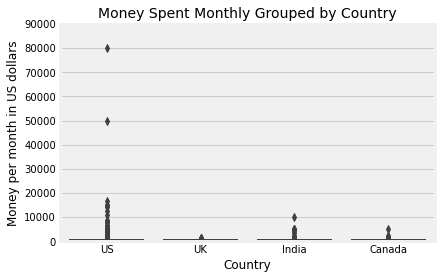

In [24]:
# Returning data on only countries of interest
filt = survey['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')
required = survey[filt]

# Creating a box plot
sns.boxplot(data=required, x='CountryLive', y='Money_Per_Month')
plt.title('Money Spent Monthly Grouped by Country', 
          fontsize = 14)
plt.ylabel('Money per month in US dollars')
plt.ylim(0, 90000)
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoiding tick labels overlaps
plt.show()

As shown in the graph above, there are two extreme outliers in the US data, and a mild one in India. Let's now eliminate the extreme outliers so that we can recompute the mean values.

In [25]:
# Eliminating extreme outliers from the dataset 
survey = survey[survey['Money_Per_Month'] < 20000]

In [29]:
# Reextracting the mean monthly amount paid in each country
country_grp = survey.groupby('CountryLive')
country_mean_amount = pd.DataFrame({'mean_amount':country_grp['Money_Per_Month'].mean()}).reset_index()

# Retrieving our country of interest
interest_countries = country_mean_amount[(country_mean_amount['CountryLive'] == 'United States of America')
                                         | (country_mean_amount['CountryLive'] == 'India')
                                         | (country_mean_amount['CountryLive'] == 'United Kingdom')
                                         | (country_mean_amount['CountryLive'] == 'Canada')]

# Resorting mean values of each country in descending order
interest_countries.sort_values('mean_amount', ascending=False).round(1)

,CountryLive,mean_amount
122,United States of America,183.8
52,India,135.1
19,Canada,113.5
121,United Kingdom,45.5


Now we can clearly see that, after removing the outliers, the average amount spent by the US has dropped. Let's now generate another boxplot to check if there are more outliers in the data.

## Replotting the Boxplot

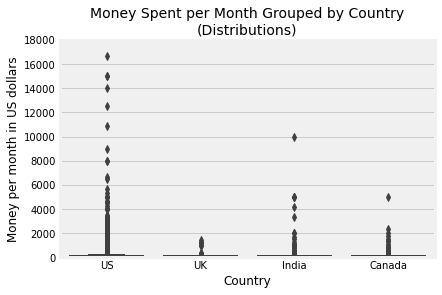

In [31]:
filt = survey['CountryLive'].str.contains('United States of America|India|Canada|United Kingdom') # filtering the dataset
required = survey[filt]
sns.boxplot(data=required, x='CountryLive', y='Money_Per_Month') # setting the x and y values
plt.title('Money Spent per Month Grouped by Country\n(Distributions)', # giving a title to the graph
         fontsize = 14) 
plt.ylabel('Money per month in US dollars')  # setting a label for y values 
plt.ylim(0,18000) # setting the y-limit to 18000
plt.xlabel('Country') # setting a label for x values
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # giving each x-axis tick the name of a country 
plt.show()

From our new boxplot, we can state any amount above `$2,000` in India is an outlier. One way to justify such amount is to understand whether students who paid over `$2,000` participated in some sort of bootcamps, which can be quite expensive comparing to standard online learning programmes.

## Checking Bootcamp Attendance

#### Outliers in India

In [32]:
# Filtering the data set to get data only India data
filt = (required['CountryLive'] == 'India') & (required['Money_Per_Month'] > 2000)
india_outlier = required[filt]
india_outlier[['CountryLive', 'AttendedBootcamp', 'BootcampName', 'MoneyForLearning', 'MonthsProgramming', 'Money_Per_Month']]

,CountryLive,AttendedBootcamp,BootcampName,MoneyForLearning,MonthsProgramming,Money_Per_Month
1728,India,0.0,NaN,20000.0,4.0,5000.000000
1755,India,0.0,NaN,50000.0,15.0,3333.333333
7989,India,0.0,NaN,5000.0,1.0,5000.000000
8126,India,0.0,NaN,5000.0,1.0,5000.000000
13398,India,0.0,NaN,20000.0,2.0,10000.000000
15587,India,0.0,NaN,100000.0,24.0,4166.666667


Unexpectedly, none of the outliers in India attended Bootcamps. It is also challenging to know whether these participants spent a lot of money on learning or not. The question in the survey is: "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?". It is possible that they misinterpreted the question, assuming that university tuition was included. So for caution, it is advisable to exclude these entries from the analysis.

In [33]:
# Dropping india_outliers columns
required = required.drop(india_outlier.index)

Let's now try to carry out the same analysis for the US' outliers. Those whose monthly spending is more than $6,000.

#### Outliers in the US

In [34]:
# Filtering the data set to get data only US data
filt = (required['CountryLive'] == 'United States of America') & (required['Money_Per_Month'] > 6000)
us_outlier = required[filt]
us_outlier[['CountryLive', 'AttendedBootcamp', 'BootcampName',
               'MoneyForLearning', 'MonthsProgramming', 'Money_Per_Month']]

,CountryLive,AttendedBootcamp,BootcampName,MoneyForLearning,MonthsProgramming,Money_Per_Month
718,United States of America,1.0,The Coding Boot Camp at UCLA Extension,8000.0,1.0,8000.000000
1222,United States of America,1.0,The Iron Yard,13000.0,2.0,6500.000000
3184,United States of America,1.0,We Can Code IT,9000.0,1.0,9000.000000
3930,United States of America,0.0,NaN,65000.0,6.0,10833.333333
6805,United States of America,1.0,Sabio.la,15000.0,1.0,15000.000000
7198,United States of America,0.0,NaN,70000.0,5.0,14000.000000
7505,United States of America,1.0,Codeup,20000.0,3.0,6666.666667
9778,United States of America,1.0,Grand Circus,8000.0,1.0,8000.000000
16650,United States of America,0.0,NaN,200000.0,12.0,16666.666667
16997,United States of America,0.0,NaN,12500.0,1.0,12500.000000


Out of the 11 outliers in the US, 6 of them attended bootcamps. This justifies the large sum of money that the respondents spent on learning. Yet, there is no justification for the remaining 5 outliers. We'll thus remove the rows where outliers did not attend bootcamp.

If we explore the `MonthsProgramming` column further, we'll notice that there are 8 outliers who spent less than 3 months on their learnings. This is an interesting finding because these coders might have paid a large amount of money for a bootcamp that lasted for several months. So we can assume that the monthly spending is unrealistic and should be lower, therefore we will remove those eight outliers' rows as well.

In [35]:
# Dropping US outliers
required = required.drop(us_outlier.index)

#### Outliers in Canada

In [36]:
# Filtering the data set to get data only Canada outliers
filt = (required['CountryLive'] == 'Canada') & (required['Money_Per_Month'] > 4000)
canada_outlier = required[filt]
canada_outlier[['CountryLive', 'AttendedBootcamp', 'BootcampName',
               'MoneyForLearning', 'MonthsProgramming', 'Money_Per_Month']]

,CountryLive,AttendedBootcamp,BootcampName,MoneyForLearning,MonthsProgramming,Money_Per_Month
13659,Canada,1.0,Bloc.io,10000.0,2.0,5000.0


In Canada, the situation is similar to some of the US respondents — this participant had been programming for no more than two months. They seem to have paid a large sum of money in the beginning to enroll in a bootcamp, and then they probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [38]:
# Removing Canada outlier
required = required.drop(canada_outlier.index)

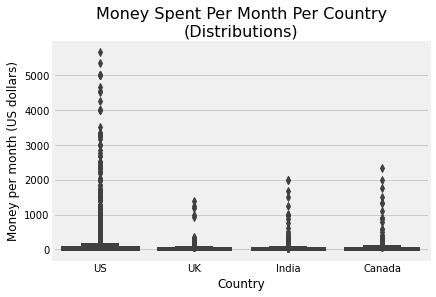

In [40]:
# Plotting box plot without outliers
sns.boxplot(data=required, x='CountryLive', y='Money_Per_Month')
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

In [42]:
# Grouping our data by countries and returning the mean amount spent
interest_grp = required.groupby('CountryLive')
interest_mean_amount = pd.DataFrame({'mean_amount':interest_grp['Money_Per_Month'].mean()}).reset_index()
interest_mean_amount['mean_amount'] = round(interest_mean_amount['mean_amount'], 2)
interest_mean_amount.sort_values('mean_amount', ascending=False).round(1)

,CountryLive,mean_amount
3,United States of America,142.6
0,Canada,93.1
1,India,65.8
2,United Kingdom,45.5


# Choosing the Two Best Markets

So far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month (around `$143`).

Since we sell subscriptions at a price of `$59` per month, Canada seems to be the second best choice: in Canada, respondents are willing to spend approximately `$93.1` per month on online learning courses. 

However, let's take a second look at India before choosing Canada:

- `$59` might actually turn out to be a cheaper option for coders in India, since they're willing to spend roughly around $65 per month.
- We have almost twice as more potential customers in India comparing to Canada.

In [43]:
# Frequency table for the 'CountryLive' column
required['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So it's not crystal clear which country to choose between Canada and India. There are good chances that India might be a better choice because of the large number of customers.

At this point, it seems that we have several options:

- Advertise in the US, India, and Canada by splitting the advertisement budget:
- 60% for the US, 25% for India, 15% for Canada.
- 50% for the US, 30% for India, 20% for Canada; etc.
- Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget. For instance:
- 70% for the US, and 30% for India.
- 65% for the US, and 35% for Canada; etc.
- Advertise only in the US.

It's best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

# Conclusion

In this project, we analysed survey data from new coders to find the best two markets to advertise in. We're working for an e-learning company which offers online courses on programming, and most of their courses are in web development, data science and game development. 

After checking the sample representativity, we explored the data to discover more about the location of new coders, their willingness to spend, and the reason behind extreme outliers. The only solid conclusion we reached is that the US would be a good market to advertise in. For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team. In this way, they can use their domain knowledge to take the best decision.

Other options to improve our analysis include: finding other criteria to choose the best markets, and/ or analysing other data sets.